# Pandas

如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。
Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

In [2]:
import numpy as np
import pandas as pd

Series

In [1]:
s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)
# Series的字符串表现形式为：索引在左边，值在右边。
# 由于我们没有为数据指定索引,于是会自动创建一个0到N-1（N为长度）的整数型索引。

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


DataFrame

In [2]:
dates = pd.date_range('20160101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])

print(df)
# DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。
# DataFrame既有行索引也有列索引，它可以被看做由Series组成的大字典。

                   a         b         c         d
2016-01-01 -0.753722 -2.179193 -0.192632  0.109785
2016-01-02 -1.640080  1.364972  0.943149 -1.361901
2016-01-03  0.369226 -0.010077  1.904807  0.564141
2016-01-04 -1.114927  1.236125 -0.593727 -0.137891
2016-01-05 -1.476629 -0.506649 -0.663824 -0.292630
2016-01-06  1.863805  0.481017 -0.012034  1.441712


In [3]:
df['b']

2016-01-01   -2.179193
2016-01-02    1.364972
2016-01-03   -0.010077
2016-01-04    1.236125
2016-01-05   -0.506649
2016-01-06    0.481017
Freq: D, Name: b, dtype: float64

In [4]:
df2 = pd.DataFrame(np.arange(12).reshape((3, 4)))
print(df2)
# 我们在创建一组没有给定行标签和列标签的数据
# 他就会采取默认的从0开始的 index

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [5]:
df3 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

print(df3)


     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [6]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
df3.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [10]:
df3.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [11]:
df3.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [12]:
df3.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [14]:
df3.T

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [13]:
df3.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-02,1.0
1,foo,train,3,1.0,2013-01-02,1.0
2,foo,test,3,1.0,2013-01-02,1.0
3,foo,train,3,1.0,2013-01-02,1.0


In [15]:
df3.sort_values(by='B')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


选择数据

In [49]:
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(dates)
print(df)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')
             A   B   C   D
2023-01-01   0   1   2   3
2023-01-02   4   5   6   7
2023-01-03   8   9  10  11
2023-01-04  12  13  14  15
2023-01-05  16  17  18  19
2023-01-06  20  21  22  23


In [50]:
df['A']

2023-01-01     0
2023-01-02     4
2023-01-03     8
2023-01-04    12
2023-01-05    16
2023-01-06    20
Freq: D, Name: A, dtype: int32

In [51]:
df.A

2023-01-01     0
2023-01-02     4
2023-01-03     8
2023-01-04    12
2023-01-05    16
2023-01-06    20
Freq: D, Name: A, dtype: int32

In [52]:
df[0:3]

,A,B,C,D
2023-01-01,0,1,2,3
2023-01-02,4,5,6,7
2023-01-03,8,9,10,11


In [53]:
df['20130102':'20130104']

,A,B,C,D


iloc是使用索引选择

In [54]:
df.iloc[3, 1]

13

In [55]:
df.iloc[3:5, 1:3]

,B,C
2023-01-04,13,14
2023-01-05,17,18


In [56]:
df.iloc[[1, 3, 5], 1:3]

,B,C
2023-01-02,5,6
2023-01-04,13,14
2023-01-06,21,22


loc使用标签选择

In [57]:
df.loc[:, ['A', 'C']]

,A,C
2023-01-01,0,2
2023-01-02,4,6
2023-01-03,8,10
2023-01-04,12,14
2023-01-05,16,18
2023-01-06,20,22


在pandas版本0.20.0及其以后版本中，ix已经不被推荐使用，建议采用iloc和loc实现ix

In [58]:
df.ix[:3, ['A', 'C']]

AttributeError: 'DataFrame' object has no attribute 'ix'

query 查询方法

In [59]:
print(df[df.A > 8])
# 相当于
print(df.query("A > 8"))

             A   B   C   D
2023-01-04  12  13  14  15
2023-01-05  16  17  18  19
2023-01-06  20  21  22  23
             A   B   C   D
2023-01-04  12  13  14  15
2023-01-05  16  17  18  19
2023-01-06  20  21  22  23


In [60]:
print(df[(df.A > 3) & (df.B < 8)])
# 相当于
print(df.query("A > 3 & B < 8"))

            A  B  C  D
2023-01-02  4  5  6  7
            A  B  C  D
2023-01-02  4  5  6  7


In [61]:
a_threshold = 3
b_threshold = 8

print(df.query("A > @a_threshold & B < @b_threshold"))

            A  B  C  D
2023-01-02  4  5  6  7


设置值

In [62]:
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(dates)
print(df)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')
             A   B   C   D
2023-01-01   0   1   2   3
2023-01-02   4   5   6   7
2023-01-03   8   9  10  11
2023-01-04  12  13  14  15
2023-01-05  16  17  18  19
2023-01-06  20  21  22  23


In [63]:
df.iloc[2, 2] = 1111
df.loc['20130101', 'B'] = 2222
df

,A,B,C,D
2023-01-01,0.0,1.0,2.0,3.0
2023-01-02,4.0,5.0,6.0,7.0
2023-01-03,8.0,9.0,1111.0,11.0
2023-01-04,12.0,13.0,14.0,15.0
2023-01-05,16.0,17.0,18.0,19.0
2023-01-06,20.0,21.0,22.0,23.0
2013-01-01,NaN,2222.0,NaN,NaN


In [66]:
df.B[df.A > 4] = 0
df

,A,B,C,D,F
2023-01-01,0.0,1.0,2.0,3.0,NaN
2023-01-02,4.0,5.0,6.0,7.0,NaN
2023-01-03,8.0,0.0,1111.0,11.0,NaN
2023-01-04,12.0,0.0,14.0,15.0,NaN
2023-01-05,16.0,0.0,18.0,19.0,NaN
2023-01-06,20.0,0.0,22.0,23.0,NaN
2013-01-01,NaN,2222.0,NaN,NaN,NaN


In [67]:
df['F'] = np.nan
df

,A,B,C,D,F
2023-01-01,0.0,1.0,2.0,3.0,NaN
2023-01-02,4.0,5.0,6.0,7.0,NaN
2023-01-03,8.0,0.0,1111.0,11.0,NaN
2023-01-04,12.0,0.0,14.0,15.0,NaN
2023-01-05,16.0,0.0,18.0,19.0,NaN
2023-01-06,20.0,0.0,22.0,23.0,NaN
2013-01-01,NaN,2222.0,NaN,NaN,NaN


In [69]:
df['E'] = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130101', periods=6))
df


,A,B,C,D,F,E
2023-01-01,0.0,1.0,2.0,3.0,NaN,NaN
2023-01-02,4.0,5.0,6.0,7.0,NaN,NaN
2023-01-03,8.0,0.0,1111.0,11.0,NaN,NaN
2023-01-04,12.0,0.0,14.0,15.0,NaN,NaN
2023-01-05,16.0,0.0,18.0,19.0,NaN,NaN
2023-01-06,20.0,0.0,22.0,23.0,NaN,NaN
2013-01-01,NaN,2222.0,NaN,NaN,NaN,1.0


处理空数据

In [70]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0, 1] = np.nan
df.iloc[1, 2] = np.nan
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [71]:
df.dropna(axis=0, how='any')
# 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 

,A,B,C,D
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [72]:
df.dropna(axis=1, how='any')

,A,D
2013-01-01,0,3
2013-01-02,4,7
2013-01-03,8,11
2013-01-04,12,15
2013-01-05,16,19
2013-01-06,20,23


In [73]:
df.fillna(value=0)

,A,B,C,D
2013-01-01,0,0.0,2.0,3
2013-01-02,4,5.0,0.0,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [75]:
# 判断是否有缺失数据 NaN, 为 True 表示缺失数据
df.isnull()

,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [76]:
# 检测在数据中是否存在 NaN, 如果存在就返回 True
np.any(df.isnull()) == True

True

导入导出

pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等

In [ ]:
data = pd.read_csv('student.csv')
data = pd.read_excel('student.xlsx', sheet_name='Sheet1')

In [ ]:
data.to_csv('student.csv')
data.to_excel('student.xlsx', sheet_name='Sheet1')
data.to_pickle('student.pickle')

合并

In [80]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 2, columns=['a', 'b', 'c', 'd'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)

print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [81]:
# index_ignore设定为True
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [84]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'], index=[1, 2, 3])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['b', 'c', 'd', 'e'], index=[2, 3, 4])
print(df1)
print(df2)

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')

print(res)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [83]:
#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')
print(res)

res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [125]:
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(df1)
print(df2)
print(df3)
print(s1)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
a    1
b    2
c    3
d    4
dtype: int64


In [88]:
res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


C:\Users\dikli\AppData\Local\Temp\ipykernel_4412\1229174992.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2, ignore_index=True)


In [89]:
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


C:\Users\dikli\AppData\Local\Temp\ipykernel_4412\2803292236.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append([df2, df3], ignore_index=True)


In [90]:
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


C:\Users\dikli\AppData\Local\Temp\ipykernel_4412\1109087232.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(s1, ignore_index=True)


In [94]:
res = pd.concat([df1, df2, df3], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0


In [138]:
res = pd.concat([df1, s1.to_frame().T], ignore_index=True, axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


In [140]:
left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

res = pd.merge(left, right, on='key')
print(res)


  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [146]:
left = pd.DataFrame({
    'key1': ['K0', 'K0', 'K1', 'K2'],
    'key2': ['K0', 'K1', 'K0', 'K1'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({
    'key1': ['K0', 'K1', 'K1', 'K2'],
    'key2': ['K0', 'K0', 'K0', 'K0'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [147]:
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


In [148]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


In [149]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [150]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


In [151]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left': ['a', 'b']})
df2 = pd.DataFrame({'col1': [1, 2, 2], 'col_right': [2, 2, 2]})

print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


In [154]:
res = pd.merge(df1, df2, on='col1', how='outer')
print(res)

   col1 col_left  col_right
0     0        a        NaN
1     1        b        2.0
2     2      NaN        2.0
3     2      NaN        2.0


In [153]:
# indicator=True会将合并的记录放在新的一列。
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [155]:
# 自定indicator column的名称
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


In [156]:
left = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']},
    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({
    'C': ['C0', 'C2', 'C3'],
    'D': ['D0', 'D2', 'D3']},
    index=['K0', 'K2', 'K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [157]:
# 依据左右资料集的index进行合并
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [158]:
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [161]:
boys = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'key': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='key', suffixes=['_boy', '_girl'], how='inner')
print(res)

  key  age
0  K0    1
1  K1    2
2  K2    3
  key  age
0  K0    4
1  K0    5
2  K3    6
  key  age_boy  age_girl
0  K0        1         4
1  K0        1         5


画图

In [4]:
import matplotlib.pyplot as plt

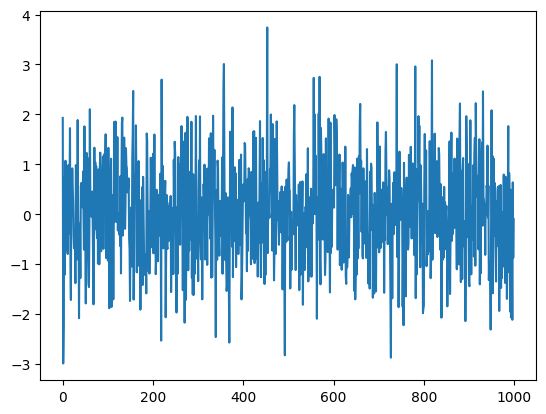

In [5]:
data = pd.Series(np.random.randn(1000), index=np.arange(1000))

# 为了方便观看效果, 我们累加这个数据
data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()

plt.show()

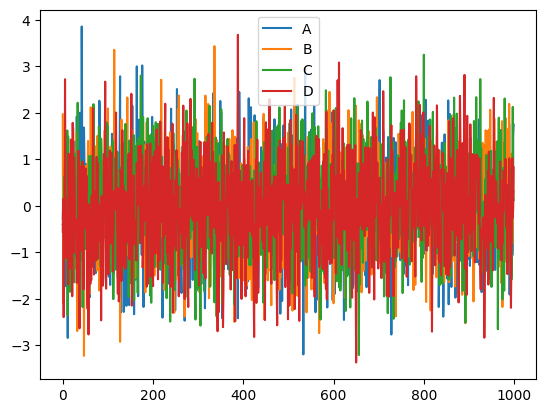

In [22]:
data = pd.DataFrame(
    np.random.randn(1000, 4),
    index=np.arange(1000),
    columns=list("ABCD")
)
data.plot()
plt.show()

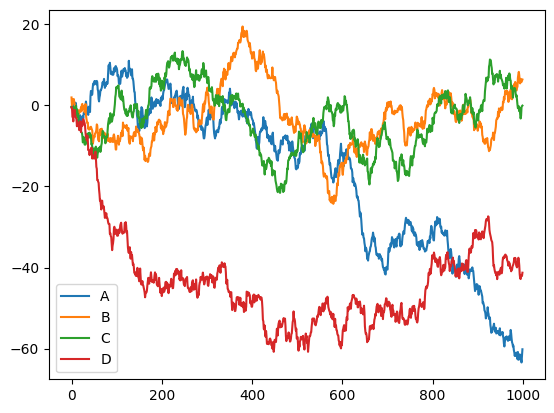

In [23]:
data.cumsum().plot()
plt.show()

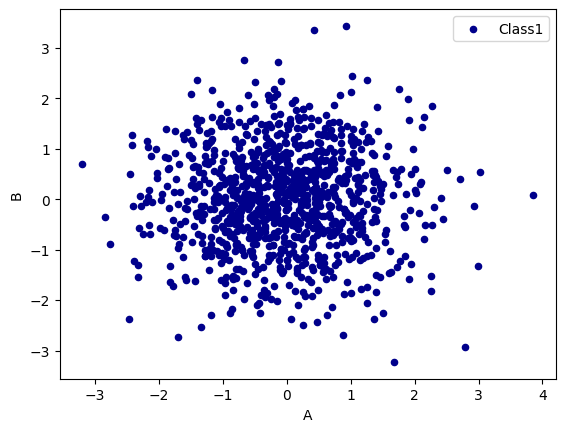

In [24]:
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label='Class1')
plt.show()

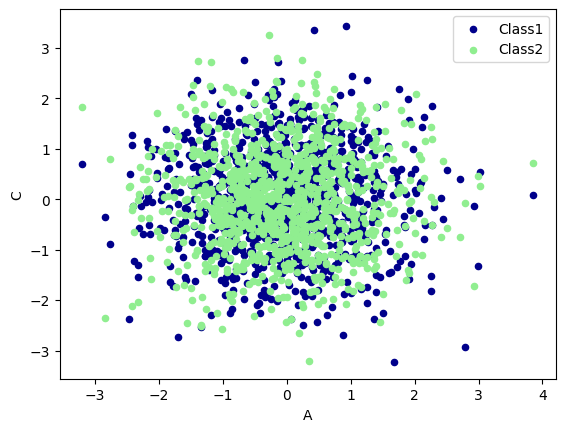

In [25]:
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label='Class1')
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class2', ax=ax)
plt.show()

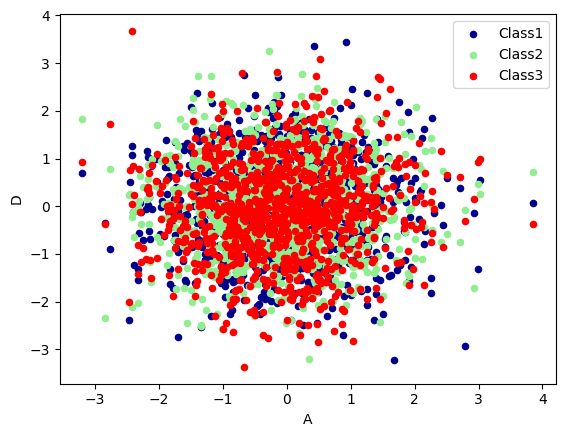

In [26]:
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label='Class1')
ax2 = data.plot.scatter(x='A', y='C', color='LightGreen', label='Class2', ax=ax)
data.plot.scatter(x='A', y='D', color='Red', label='Class3', ax=ax)
plt.show()